# Convolution
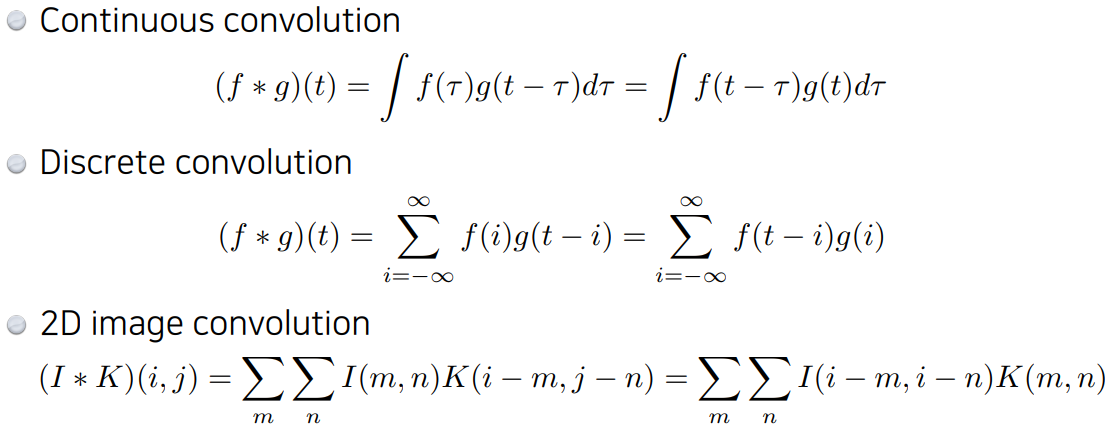
- 연속형
- 이산형
- 2차원 이미지 컨볼루션

- k x k 크기의 커널(필터)이라는 것을 i x i 크기의 이미지를 훑으면서 계산을 수행한다. (k <= i)
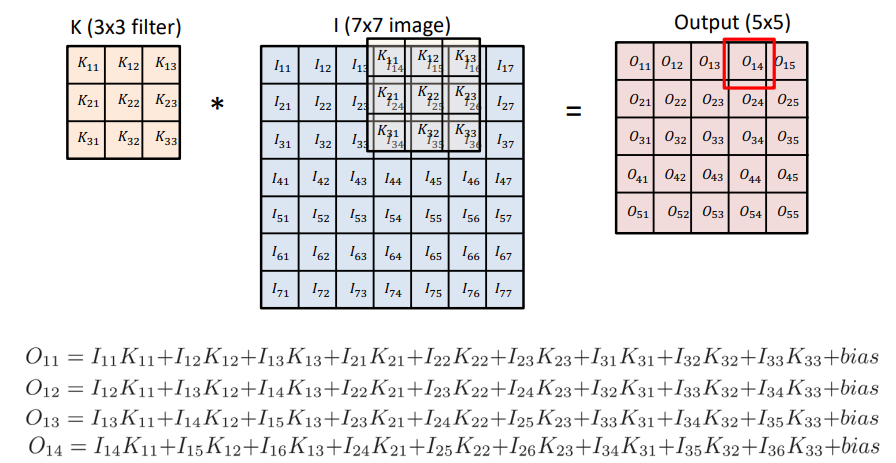

## 2D Convolution in action
- 2D 컨볼루션을 한다는 것은 해당 컨볼루션 필터의 모양을 해당 이미지에 찍어내는 것.


- 적용하고자 하는 필터의 모양에 따라 같은 이미지의 아웃풋이 Blur, Emboss, Outline 등 다양한 결과가 나온다.
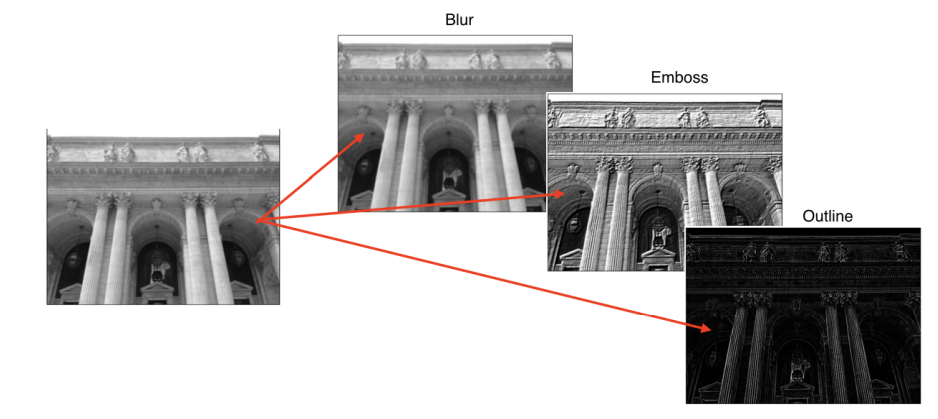

## RGB Image Convolution
- 일반적으로 색깔이 있는 RGB 이미지를 다룬다.


- 이미지를 수학적으로 텐서로 표현.


- 만약 32 x 32 x 3 크기의 이미지를 컨볼루션 할 때 5 x 5 필터를 적용시킨다는 것은 5 x 5 x 3 필터를 적용한다는 것과 같은 말이다.


- 아웃풋은 28 x 28 x 1 크기가 된다.
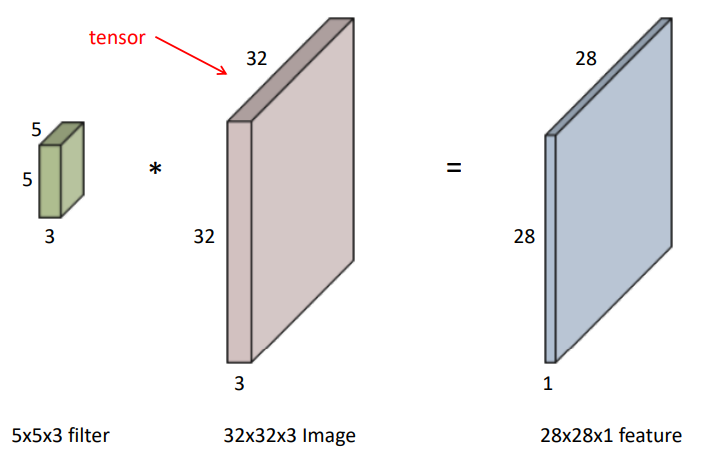

- 여기서 5 x 5 x 3 필터 4개를 적용시키면 아래와 같이 28 x 28 x 1 크기의 아웃풋이 4개가 생겨서 28 x 28 x 4 크기가 된다.
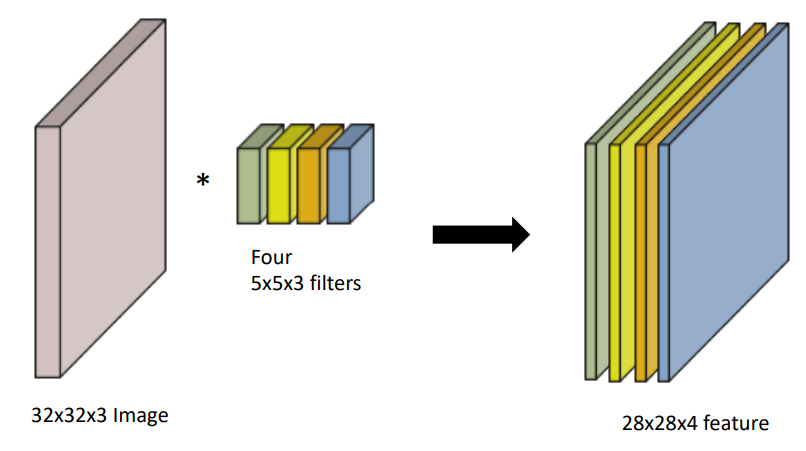

## Stack of Convolutions
- 32 x 32 x 3 텐서에 5 x 5 x 3 필터 4개를 적용 => 28 x 28 x 4 아웃풋
- 28 x 28 x 4 텐서에 5 x 5 x 4 필터 10개를 적용 => 24 x 24 x 10 아웃풋
- ...
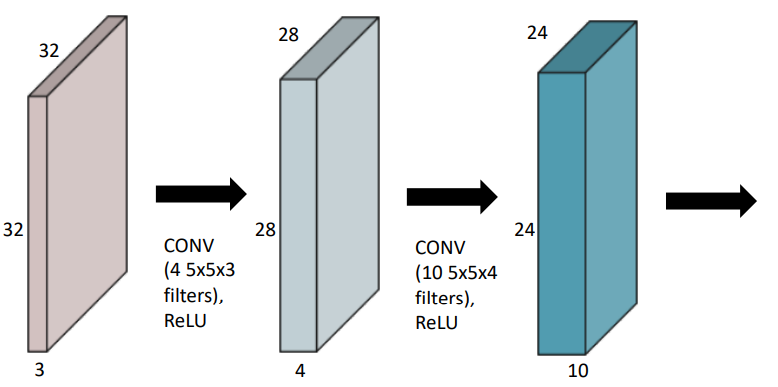

# Convolutional Neural Networks
- CNN consists of convolution layer, pooling layer, and fully connected layer.
    - Convolution and pooling layers : feature extraction
    - fully connected layer : decision making(e.g., classificaion)


- 일반적인 CNN은 컨볼루션 레이어와 풀링 레이어가 있다.(2x2, max, average pooling)


- 컨볼루션과 풀링 레이어는 이미지의 유용한 정보를 뽑아낸다.


- fully connected layer는 원하는 결과를 출력하게 한다.


- 최근 트렌드는 fully connected layer가 점점 없애거나 최소화 시킨다. 파라미터 숫자에 의존하기 때문이다.
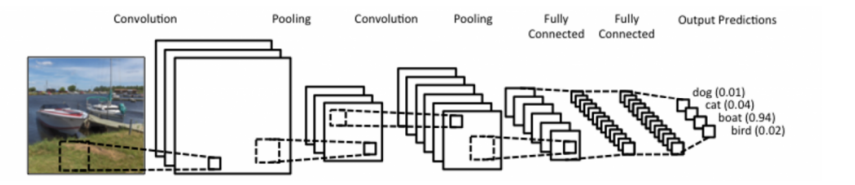

## Convolution Arithmetic(of GoogLeNet)
- 나중에 뉴럴네트워크에 대해 파라미터가 몇 개인지 직접 손으로 계산해보기!
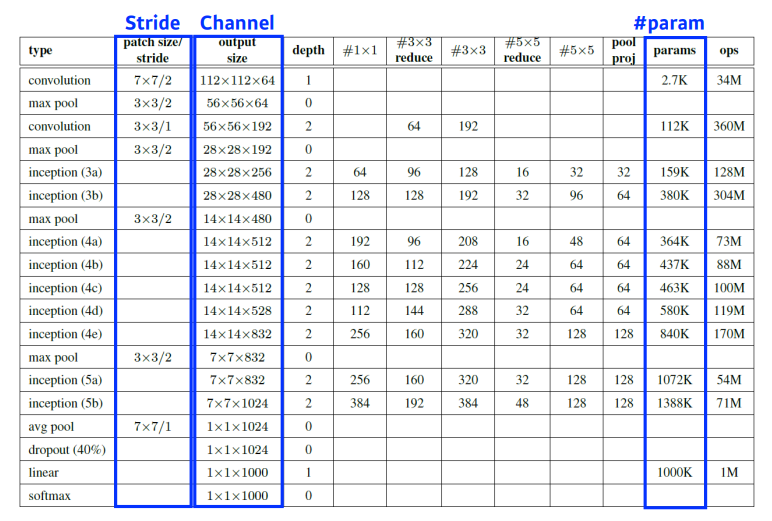

## Stride
- 넓게 걷는다는 뜻이다.


- 기본적으로 stride는 1이다.


- ex) 7개의 인풋이 있고 stride를 1과 2일 때를 비교하면 아래와 같다.
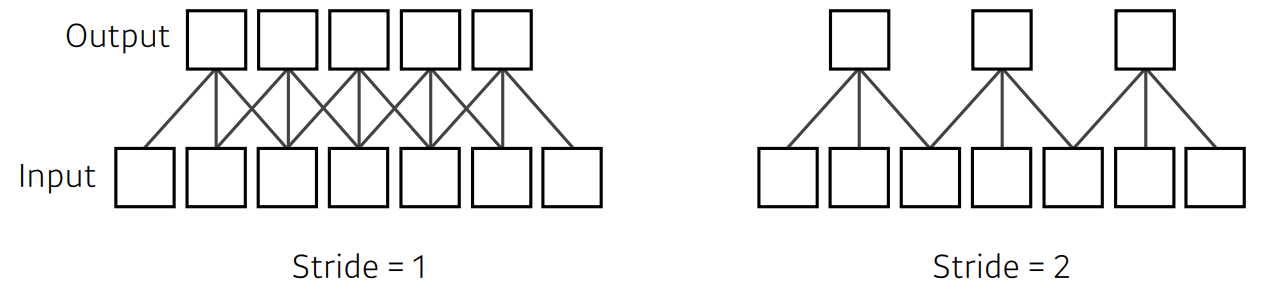

## Padding
- 텐서에 필터를 적용시키면 일반적으로 아웃풋의 크기가 줄어든다.


- 왜냐하면 텐서의 가장자리는 필터가 찍어낼 수 없기 때문이다.


- 가장자리도 필터가 찍어낼 수 있도록 텐서의 크기를 덧붙여주는 것이다.(크기를 늘려준다.)


- 패딩을 이용하여 인풋과 아웃풋의 크기를 똑같이 만들어 줄 수 있다.
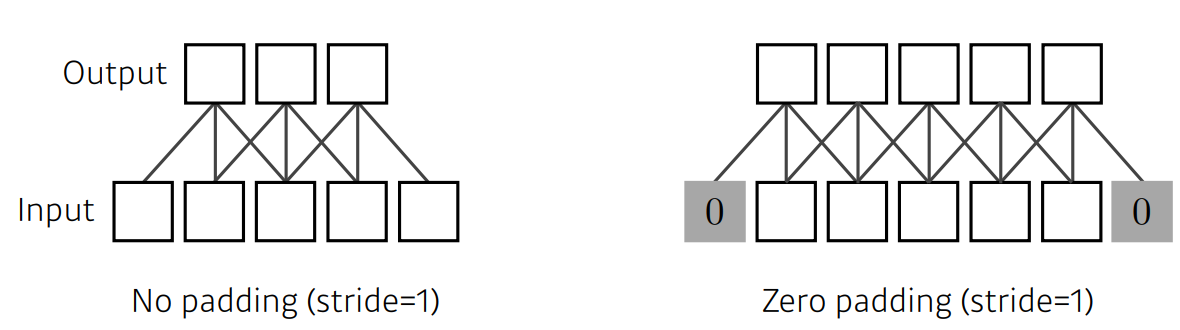

## Stride? Padding?
- 스트라이드와 패딩을 이용하여 아웃풋의 크기를 결정할 수 있다.
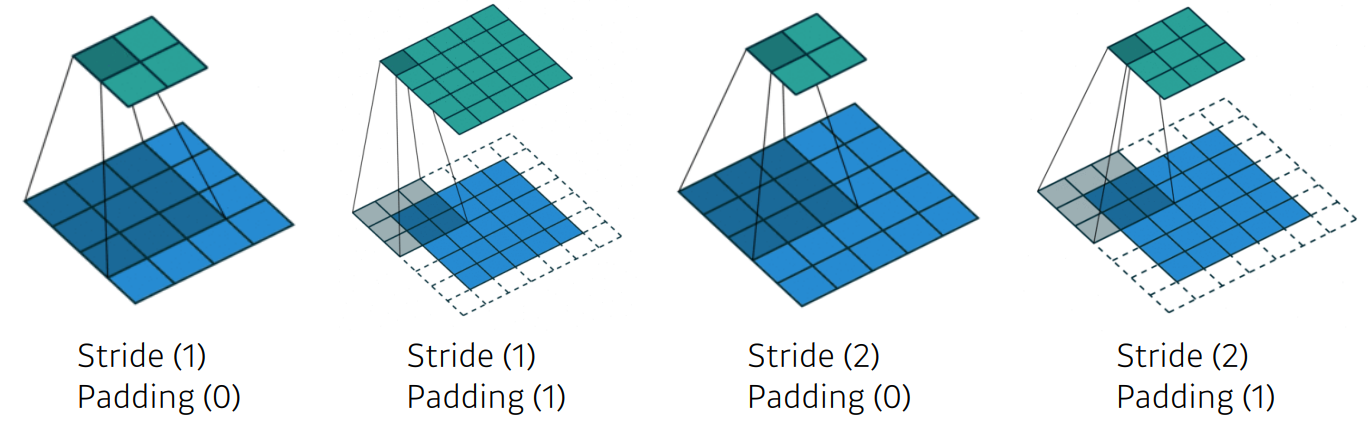

## Convolution Arithmetic
- Padding (1), Stride (1), 3 x 3 Kernel
- 40 x 50 x 128 텐서에 3 x 3 x 128 필터를 적용시키면 40 x 50 x 1 텐서가 된다(Padding = 1)
- 그런데 output은 40 x 50 x 64 이므로 3 x 3 x 128 필터를 64개 적용했다는 것을 알 수 있다.
- 그렇기 때문에 파라미터의 개수는 **3 x 3 x 128 x 64 = 73,728** 개이다.
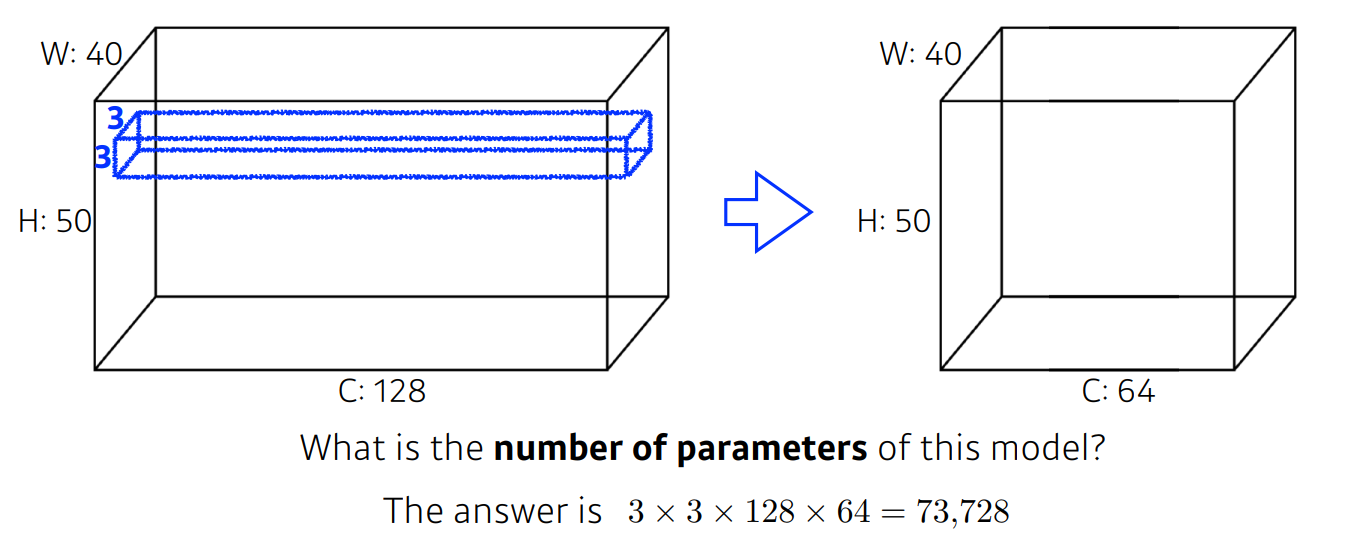

# Exercise - AlexNet의 파라미터 개수 계산해보기
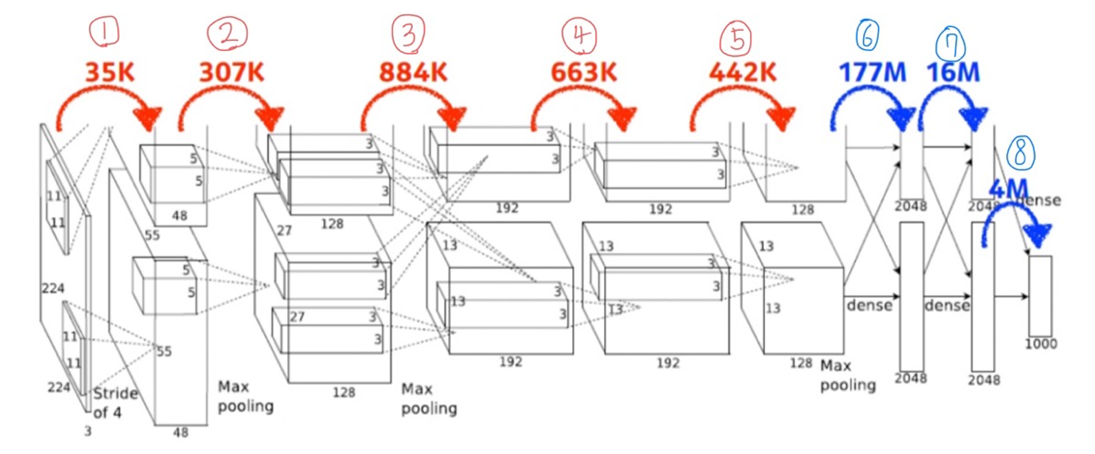

1 => (11 x 11 x 3 x 48) x 2 = 34,848

2 => (5 x 5 x 48 x 128) x 2 = 307,200

3 => ((3 x 3 x 128) x 2) x 192 x 2 = 884,736

4 => (3 x 3 x 192 x 192) x 2 = 663,552

5 => (3 x 3 x 192 x 128) x 2 = 442,368

6 => (13 x 13 x 128 x 2) x (2048 * 2) = 177,209,344

7 => (2048 x 2) x (2048 x 2) = 16,777,216

8 => (2048 x 2) x 1000 = 4,096,000

- Convolution 레이어에 비해 Dense 레이어의 파라미터 개수가 엄청 많은 것을 알 수 있다.


- 그렇기 때문에 최근에는 뒷단에 있는 fully conntected 레이어를 줄이고 앞의 convolution 레이어를 깊게 쌓는 것이다.


- 이런 시도를 통해 Neural Network의 깊이는 점점 깊어지지만 파라미터 숫자는 줄어들고 성능은 높아지고 있다.

# 1 x 1 Convolution
- 픽셀을 하나하나 다 보지만 채널만 줄이는 것이다.
- Why?
    - Dimension reduction
    - To reduce the number of parameters while increasing the depth
    - 차원을 감소시키고 깊이가 깊어질수록 파라미터 개수를 줄이기 위한 것이다.
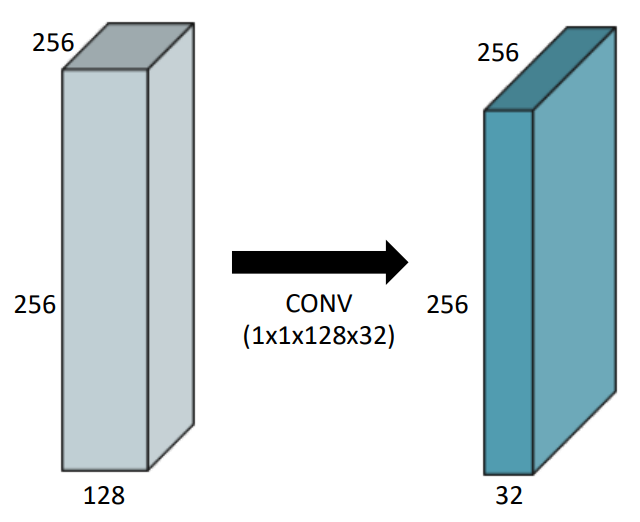